In [3]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
train_data, train_meta = arff.loadarff('./dataset/FordA_TRAIN.arff')
test_data, test_meta = arff.loadarff('./dataset/FordA_TEST.arff')

# 데이터프레임으로 변환
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# 시각화를 위해 데이터 일부 출력
print(train_df.head())
print(test_df.head())


       att1      att2      att3      att4      att5      att6      att7  \
0 -0.797172 -0.664392 -0.373015  0.040815  0.526936  0.984288  1.353120   
1  0.804855  0.634629  0.373474  0.038343 -0.340988 -0.740860 -1.109667   
2  0.727985  0.111284 -0.499124 -1.068629 -1.578351 -1.990534 -2.302031   
3 -0.234439 -0.502157 -0.732488 -0.946128 -1.139739 -1.323336 -1.490243   
4 -0.171328 -0.062285  0.235829  0.710396  1.239969  1.649823  1.876321   

       att8      att9     att10  ...    att492    att493    att494    att495  \
0  1.578108  1.659251  1.640809  ...  0.722417  0.362068  0.092083 -0.081268   
1 -1.395357 -1.570192 -1.619951  ...  0.049213 -0.258138 -0.510583 -0.683647   
2 -2.503403 -2.585211 -2.550600  ...  0.463685  0.507735  0.517174  0.504588   
3 -1.607077 -1.620430 -1.506933  ... -0.929437 -0.922761 -0.929437 -0.909409   
4  1.865535  1.703751  1.466467  ...  0.725496  0.697453  0.731967  0.808545   

     att496    att497    att498    att499    att500  target  
0 -0.2

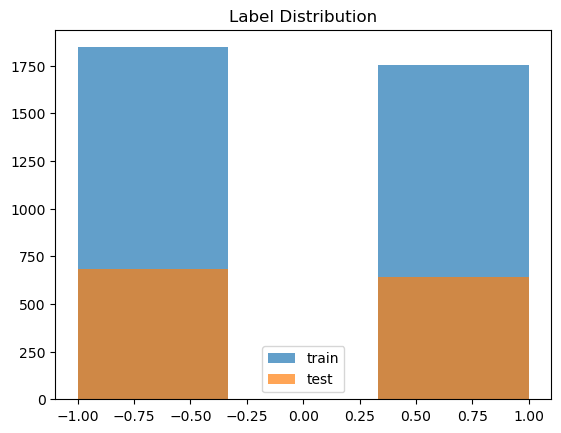

Number of normal samples in training data: 1846
Number of abnormal samples in training data: 1755


In [4]:
# 데이터 전처리
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].astype(int).values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].astype(int).values

# 라벨 분포 시각화
plt.hist(y_train, bins=3, alpha=0.7, label='train')
plt.hist(y_test, bins=3, alpha=0.7, label='test')
plt.legend()
plt.title('Label Distribution')
plt.show()

# 정상 데이터와 비정상 데이터 분리
X_train_normal = X_train[y_train == -1]
X_train_abnormal = X_train[y_train == 1]

# 데이터가 올바르게 분리되었는지 확인
print(f"Number of normal samples in training data: {X_train_normal.shape[0]}")
print(f"Number of abnormal samples in training data: {X_train_abnormal.shape[0]}")


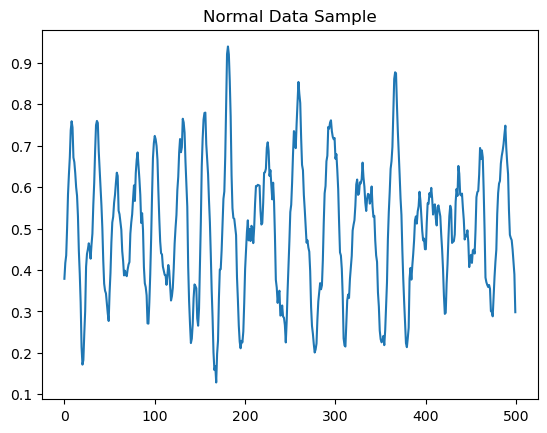

In [5]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normal_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test)

# 시각화 (정상 데이터 샘플)
plt.plot(X_train_normal_scaled[0])
plt.title('Normal Data Sample')
plt.show()


Epoch 1/20


2024-07-03 12:04:47.381187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-03 12:04:47.381209: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-03 12:04:47.381215: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-03 12:04:47.381401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-03 12:04:47.381415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-03 12:04:47.763448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0248 - val_loss: 0.0220
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - val_loss: 0.0182
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - val_loss: 0.0159
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0102


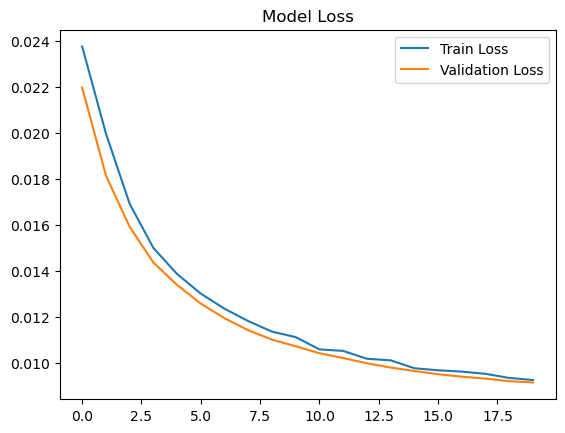

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 오토인코더 모델 구성
input_dim = X_train_normal_scaled.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')

# 모델 학습
history = autoencoder.fit(X_train_normal_scaled, X_train_normal_scaled,
                          epochs=20,
                          batch_size=32,
                          validation_split=0.2,
                          shuffle=True)

# 학습 결과 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


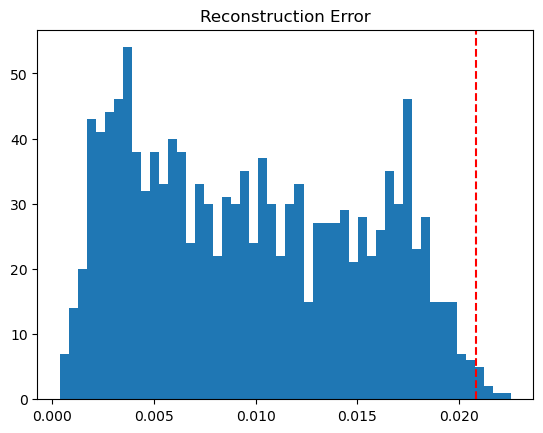

              precision    recall  f1-score   support

       False       0.51      0.99      0.67       681
        True       0.00      0.00      0.00       639

    accuracy                           0.51      1320
   macro avg       0.26      0.49      0.34      1320
weighted avg       0.26      0.51      0.35      1320



In [7]:
# 재구성 오차 계산
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# 임계값 설정 (평균 + 2표준편차)
threshold = np.mean(mse) + 2 * np.std(mse)

# 이상 데이터 탐지
y_pred = mse > threshold

# 결과 시각화
plt.hist(mse, bins=50)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Reconstruction Error')
plt.show()

# 이상 탐지 성능 평가
from sklearn.metrics import classification_report
print(classification_report(y_test == 1, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
정상 데이터입니다.


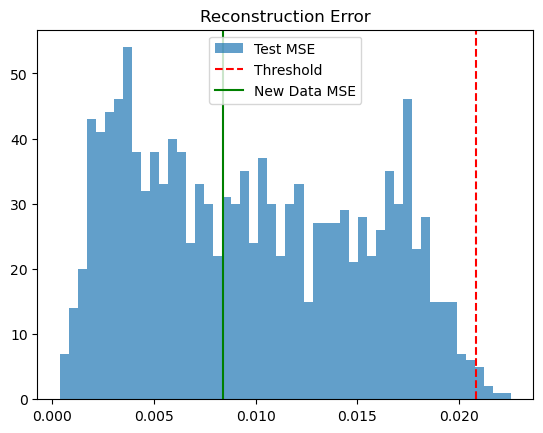

New Data MSE: 0.008392208239417241
Threshold: 0.02081226839593618


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 새로운 센서 데이터 입력 (임의로 생성된 데이터 예시)
new_sensor_data = np.random.rand(1, 500)  # 500개의 센서 데이터를 가진 1개의 샘플

# 데이터 정규화
new_sensor_data_scaled = scaler.transform(new_sensor_data)

# 재구성 오차 계산
new_reconstruction = autoencoder.predict(new_sensor_data_scaled)
new_mse = np.mean(np.power(new_sensor_data_scaled - new_reconstruction, 2), axis=1)

# 임계값과 비교하여 정상/비정상 판단
is_abnormal = new_mse > threshold

# 결과 출력
if is_abnormal:
    print("비정상 데이터입니다.")
else:
    print("정상 데이터입니다.")

# 재구성 오차 시각화
plt.hist(mse, bins=50, alpha=0.7, label='Test MSE')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.axvline(new_mse, color='g', linestyle='-', label='New Data MSE')
plt.title('Reconstruction Error')
plt.legend()
plt.show()

# 재구성 오차 값 출력
print(f"New Data MSE: {new_mse[0]}")
print(f"Threshold: {threshold}")
